In [1]:
import re
import numpy as np
import pandas as pd

# remove english stopwords with the help of the gensim library 
from gensim.parsing.preprocessing import remove_stopwords

import string

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


# cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

# cleaning and removing mentions 
def remove_mentions(word):
    return re.sub(r"@\S+", "", word)

# removing emojis 
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

stemmer = PorterStemmer()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text])

lemmatizer = WordNetLemmatizer()

def lematize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text])

In [3]:
def preprocessing(df):
    # lower cases 
    df = df.str.lower()
    print("Text of tweets transformed to lower cases.")
    
    # remove english stopwords with the help of the gensim library 
    df = df.apply(lambda text: remove_stopwords(text))
    print("Removed stopwords from the text of tweets.")
    
    #cleaning and removing punctuation
    df = df.apply(lambda x: cleaning_punctuations(x))
    print("Cleaned and removed the punctuations.")
    
    # cleaning and removing URLs
    df = df.apply(lambda x: cleaning_URLs(x))
    df = df.apply(lambda x: remove_hyperlink(x))
    print("Cleaned and removed the URLs and hyperlinks.")
    
    # cleaning and removing mentions 
    df = df.apply(lambda x: remove_mentions(x))
    print("Cleaned and removed the mentions.")
    
    # removing emojis 
    df = df.apply(lambda x: emoji_pattern.sub(r'', x))
    print("Removed the emojis.")
    
    # remove numbers 
    df = df.apply(lambda x: re.sub("[^a-zA-Z]", " ", x))
    print("Removed the numbers.")
    
    # Text normalization : tokenize the tweets 
    # split tweets of text into tokens (individual words of terms)
    tokenize_tweets = df.apply(lambda x: x.split())
    print("Tokenized the text.")
    
    # Normalization: use of PorterStemmer()
    tokenize_tweets = tokenize_tweets.apply(lambda text: lematize_words(text))
    print("Normalized the text.")
    
    # write new csv file containing the preprocessed dataset
    return tokenize_tweets

In [40]:
# loading the dataset 
df = pd.read_csv('datasets/sample_user_descr.csv', usecols=['user_name','user_description','label'])

In [41]:
df

,user_name,user_description,label
0,Speak,"Join 20,000+ researchers and marketers using S...",0.0
1,CanGPT,I tweet about #AI #ChatGPT #Web3 🚀🚀,0.0
2,Best MidJourneyAI Generated Art🤖🎨,follow my twitter account if you like the cont...,0.0
3,NikPeachey,Co-founder https://t.co/6o0xPcZuc4. Award-Winn...,0.0
4,Webrpoint,We provide the solutions on Web Technology by ...,0.0
...,...,...,...
195,Dennis Kirwan,"Ever since I can remember, my curious mind has...",0.0
196,Kamran (Shuja Kami),An #SMM and an affiliate marketing guy. #Blogg...,0.0
197,Hady Ghandour,"Experienced Telecom/ICT professional, @AUBalum...",0.0
198,឵,𝑰 𝒉𝒂𝒗𝒆 𝒏𝒐𝒕𝒉𝒊𝒏𝒈 𝒕𝒐 𝒅𝒆𝒄𝒍𝒂𝒓𝒆. \nhttps://t.co/RBEW...,0.0


## Dataset preprocessing

In [42]:
# SCIENTIST/RESEARCHER/ENGINEER : 1
# NOT SCIENTIST : 0

df.label.value_counts() 

0.0    177
1.0     18
Name: label, dtype: int64

In [43]:
df.isnull().values.any()
df.isnull().sum()

user_name           0
user_description    0
label               5
dtype: int64

In [44]:
df = df.dropna()

## Balancing data 

In our case, we have relatively very few datas labeled with 1 than those labeled with 0. We decide to upsample the minority class for a better training.

In [45]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df[df.label == 0]
minority_class = df[df.label == 1]

# Upsample the minority class
upsampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class))

# Combine the upsampled minority class with the majority class
balanced_data = pd.concat([majority_class, upsampled_minority])

# Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42)

In [46]:
balanced_data

,user_name,user_description,label
155,Melvin,Works as Machine Learning Engineer. Solopreneu...,1.0
45,Aaron Junker,Mastodon: @AaronJunker@phpc.social,0.0
135,Yuriy Yuzifovich,"Technology enthusiast. Ex-Nominum, Ex-@Akamai....",1.0
103,Aakash Chowkase,Post-doc @UCBerkeley @GreaterGoodSC. PhD in Ed...,1.0
62,Aimie Sibson,Co-founder & CEO Hero,0.0
...,...,...,...
80,pipik_roman,"Software Dev. at https://t.co/Iw3EvbMYdl, husb...",0.0
119,Wes 🇨🇦✌️🇺🇦,I'm an IT manager in my early 40's. To be hone...,0.0
116,"Natarajan Ganesan, PhD","Scientist, Entrepreneur, Educator. Tweets are ...",1.0
55,Lon Baker,"Multi-talented entrepreneur, engineer, content...",1.0


In [47]:
df = balanced_data

In [48]:
df.isnull().values.any()
df.isnull().sum()

user_name           0
user_description    0
label               0
dtype: int64

In [49]:
df.label

155    1.0
45     0.0
135    1.0
103    1.0
62     0.0
      ... 
80     0.0
119    0.0
116    1.0
55     1.0
114    0.0
Name: label, Length: 354, dtype: float64

In [50]:
temp = df.user_description

In [51]:
temp

155    Works as Machine Learning Engineer. Solopreneu...
45                    Mastodon: @AaronJunker@phpc.social
135    Technology enthusiast. Ex-Nominum, Ex-@Akamai....
103    Post-doc @UCBerkeley @GreaterGoodSC. PhD in Ed...
62                                 Co-founder & CEO Hero
                             ...                        
80     Software Dev. at https://t.co/Iw3EvbMYdl, husb...
119    I'm an IT manager in my early 40's. To be hone...
116    Scientist, Entrepreneur, Educator. Tweets are ...
55     Multi-talented entrepreneur, engineer, content...
114    Investing in @rockaway_x, ex-ITSec software en...
Name: user_description, Length: 354, dtype: object

In [52]:
# check if there is any NaN value
temp.isnull().values.any()
temp.isnull().sum()

0

In [53]:
descr = preprocessing(temp)

Text of tweets transformed to lower cases.
Removed stopwords from the text of tweets.
Cleaned and removed the punctuations.
Cleaned and removed the URLs and hyperlinks.
Cleaned and removed the mentions.
Removed the emojis.
Removed the numbers.
Tokenized the text.
Normalized the text.


In [54]:
descr

155    work machine learning engineer solopreneur eve...
45                        mastodon aaronjunkerphpcsocial
135    technology enthusiast exnominum exakamai proud...
103    postdoc ucberkeley greatergoodsc phd education...
62                                    cofounder ceo hero
                             ...                        
80     software dev husband father catholic christian...
119    im manager early s honest gotten crypto sooner...
116    scientist entrepreneur educator tweet fleeting...
55     multitalented entrepreneur engineer content cr...
114    investing rockawayx exitsec software engineer ...
Name: user_description, Length: 354, dtype: object

## Model training

Apply Logistic Regression with W2V embedding (see paper for gender classification based on tweet text https://www.researchgate.net/publication/344003069_Gender_Classification_using_Twitter_Text_Data) 

In [55]:
import gensim

# Word2Vec features: 
tokenize_tweet = descr.apply(lambda x: x.split())

model_W2V = gensim.models.Word2Vec(tokenize_tweet, 
                                   vector_size = 200, # No. of features
                                   window =  5, # default window
                                   min_count = 2, 
                                   sg = 1, # 1 for skip-gram model
                                   hs = 0,
                                   negative = 10, # for negative sampling
                                   workers = 2,  # No. of cores
                                   seed = 34 )

model_W2V.train(tokenize_tweet, total_examples= len(descr), epochs=20)

(46646, 78000)

In [66]:
w2v_words = list(model_W2V.wv.index_to_key)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  421
sample words  ['ai', 'engineer', 'learning', 'data', 'machine', 'tweet', 'opinion', 'leading', 'science', 'leader', 'scientist', 'passionate', 'educator', 'research', 'entrepreneur', 'system', 'technology', 'innovation', 'prompt', 'work', 'phd', 'microsoft', 'solopreneur', 'investment', 'evening', 'weekend', 'revolution', 'llm', 'education', 'development', 'teacher', 'gpt', 'enthusiast', 'chatgpt', 'tech', 'advocate', 'world', 'content', 'news', 'llmops', 'lead', 'mlops', 'product', 'researcher', 'follow', 'alum', 'help', 'supportjpf', 'agent', 'proud']


In [67]:
from tqdm import tqdm

vector = []
for sent in tqdm(tokenize_tweet):
    sent_vec = np.zeros(200)
    count = 0
    for word in sent: 
        if word in w2v_words:
            vec = model_W2V.wv[word]
            sent_vec += vec 
            count += 1
    if count != 0:
        sent_vec /= count #normalize
    vector.append(sent_vec)
    
print(len(vector))
print(len(vector[0]))

100%|██████████████████████████████████████████████████████████████████████████████| 354/354 [00:00<00:00, 4938.61it/s]

354
200


In [68]:
# Split the train and test datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

x_train_w2v, x_test_w2v, y_train_w2v, y_test_w2v = train_test_split(vector, df.label, test_size=0.3) 

In [69]:
# check if there is any NaN value

y_train_w2v.isnull().values.any()
y_train_w2v.isnull().sum()

0

In [70]:
#parameters in Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],
                'warm_start':[True, False]}
print(param_grid_lr)

{'C': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0], 'warm_start': [True, False]}


In [71]:
#best parameters for LR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

model_lr = LogisticRegression()

LR_RandomGrid = RandomizedSearchCV(estimator = model_lr, param_distributions = param_grid_lr, cv = 10, verbose=2, n_jobs = 4)
LR_RandomGrid.fit(x_train_w2v, y_train_w2v)
LR_RandomGrid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'warm_start': True, 'C': 10.0}

In [72]:
from sklearn.metrics import classification_report 

model_lr = LogisticRegression(C=10.0, warm_start=True, max_iter=100, multi_class='auto')
model_lr = model_lr.fit(x_train_w2v, y_train_w2v)
prediction_lr = model_lr.predict(x_test_w2v)

print(classification_report(y_test_w2v, prediction_lr))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        60
         1.0       0.96      1.00      0.98        47

    accuracy                           0.98       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.98      0.98      0.98       107



In [81]:
prediction_lr

array([1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0.])

## Classification of dataset

In [84]:
# loading the dataset 
df = pd.read_csv('datasets/sentiment_chatgpt.csv', usecols=['user_name', 'user_description','tweets','label', 'date'])

In [85]:
df

,user_description,tweets,label,date
0,building draftmateai developer author chatgpt ...,happy share draftmateai support day free trial...,positiv,2023-04-26 13:02:16+00:00
1,nomadic marketing vigilante graphic web design...,integrate chatgpt marketo smart campaign disco...,positiv,2023-04-26 13:02:06+00:00
2,leading translation management platform locali...,pleased announce new patentpending technology ...,positiv,2023-04-26 13:02:05+00:00
3,engineering leader coach mentor building remot...,starting tire scolded chatgpt slight perceived...,neutral,2023-04-26 13:02:00+00:00
4,stop learning research develop uild future eyo...,spartajustice it notable wikipedia entry john ...,positiv,2023-04-26 13:01:52+00:00
...,...,...,...,...
369265,brain meant processing million tweet post vide...,chatgpt biggest smartest brain world right now...,negativ,2022-12-05 17:11:10+00:00
369266,blockchain enthusiast philanthropist slave jav...,levelsso happy chatgpt team com revolutionary ...,positiv,2022-12-05 17:10:31+00:00
369267,mathematician developer amazon previously geob...,russel chatgpt it funny take long time answer ...,neutral,2022-12-05 17:09:04+00:00
369268,passionate nature software developer profession,wondering difference jasper chatgpt gpt chatgp...,positiv,2022-12-05 17:08:44+00:00


In [86]:
descr = df.user_description

In [87]:
descr

0         building draftmateai developer author chatgpt ...
1         nomadic marketing vigilante graphic web design...
2         leading translation management platform locali...
3         engineering leader coach mentor building remot...
4         stop learning research develop uild future eyo...
                                ...                        
369265    brain meant processing million tweet post vide...
369266    blockchain enthusiast philanthropist slave jav...
369267    mathematician developer amazon previously geob...
369268      passionate nature software developer profession
369269    postdoc gipplab unigoettingen phd unikonstanz ...
Name: user_description, Length: 369270, dtype: object

In [88]:
# check if there is any NaN value
descr.isnull().values.any()
descr.isnull().sum()

0

In [89]:
# Word2Vec features: 
tokenize_tweet = descr.apply(lambda x: x.split())

model_W2V.train(tokenize_tweet, total_examples= len(descr), epochs=20)

(23691661, 72575240)

In [90]:
w2v_words = list(model_W2V.wv.index_to_key)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  421
sample words  ['ai', 'engineer', 'learning', 'data', 'machine', 'tweet', 'opinion', 'leading', 'science', 'leader', 'scientist', 'passionate', 'educator', 'research', 'entrepreneur', 'system', 'technology', 'innovation', 'prompt', 'work', 'phd', 'microsoft', 'solopreneur', 'investment', 'evening', 'weekend', 'revolution', 'llm', 'education', 'development', 'teacher', 'gpt', 'enthusiast', 'chatgpt', 'tech', 'advocate', 'world', 'content', 'news', 'llmops', 'lead', 'mlops', 'product', 'researcher', 'follow', 'alum', 'help', 'supportjpf', 'agent', 'proud']


In [91]:
vector = []
for sent in tqdm(tokenize_tweet):
    sent_vec = np.zeros(200)
    count = 0
    for word in sent: 
        if word in w2v_words:
            vec = model_W2V.wv[word]
            sent_vec += vec 
            count += 1
    if count != 0:
        sent_vec /= count #normalize
    vector.append(sent_vec)
    
print(len(vector))
print(len(vector[0]))

100%|████████████████████████████████████████████████████████████████████████| 369270/369270 [01:17<00:00, 4781.97it/s]

369270
200


In [92]:
prediction_sc = model_lr.predict(vector)

In [93]:
prediction_sc

array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
dataframe = {'user_description': df.user_description.values, 'SC': prediction_sc, 'tweets': df.tweets.values, 'label': df.label.values, 'date': df.date.values}

In [95]:
result = pd.DataFrame(dataframe)

In [96]:
result

,user_description,SC,tweets,label,date
0,building draftmateai developer author chatgpt ...,0.0,happy share draftmateai support day free trial...,positiv,2023-04-26 13:02:16+00:00
1,nomadic marketing vigilante graphic web design...,0.0,integrate chatgpt marketo smart campaign disco...,positiv,2023-04-26 13:02:06+00:00
2,leading translation management platform locali...,0.0,pleased announce new patentpending technology ...,positiv,2023-04-26 13:02:05+00:00
3,engineering leader coach mentor building remot...,0.0,starting tire scolded chatgpt slight perceived...,neutral,2023-04-26 13:02:00+00:00
4,stop learning research develop uild future eyo...,0.0,spartajustice it notable wikipedia entry john ...,positiv,2023-04-26 13:01:52+00:00
...,...,...,...,...,...
369265,brain meant processing million tweet post vide...,0.0,chatgpt biggest smartest brain world right now...,negativ,2022-12-05 17:11:10+00:00
369266,blockchain enthusiast philanthropist slave jav...,0.0,levelsso happy chatgpt team com revolutionary ...,positiv,2022-12-05 17:10:31+00:00
369267,mathematician developer amazon previously geob...,0.0,russel chatgpt it funny take long time answer ...,neutral,2022-12-05 17:09:04+00:00
369268,passionate nature software developer profession,0.0,wondering difference jasper chatgpt gpt chatgp...,positiv,2022-12-05 17:08:44+00:00


In [98]:
result.SC.value_counts() 

0.0    362603
1.0      6667
Name: SC, dtype: int64

In [100]:
result.to_csv('datasets/sentiment_chatgpt_sc.csv')

In [101]:
scientists = result[result.SC == 1]

In [102]:
len(scientists)

6667

In [103]:
scientists

,user_description,SC,tweets,label,date
14,chatgpt powered free trading signal let grow m...,1.0,sell rsi bybit recommendation short ticker ios...,positiv,2023-04-26 13:00:16+00:00
22,chatgpt powered free trading signal let grow m...,1.0,sell rsi bybit recommendation short ticker ilv...,positiv,2023-04-26 12:59:29+00:00
40,chatgpt powered free trading signal let grow m...,1.0,sell rsi bybit recommendation short ticker flm...,positiv,2023-04-26 12:53:58+00:00
41,chatgpt powered free trading signal let grow m...,1.0,sell rsi bybit recommendation short ticker fil...,neutral,2023-04-26 12:53:25+00:00
54,chatgpt powered free trading signal let grow m...,1.0,sell rsi bybit recommendation short ticker eth...,positiv,2023-04-26 12:52:37+00:00
...,...,...,...,...,...
367973,attract complication easily distracted sing so...,1.0,chatgpt thought dalle too favourite,negativ,2022-12-05 21:32:20+00:00
368229,hate speech outlet out moving arisinfosecexchange,1.0,chatgpt big brother share wisdom experience pr...,positiv,2022-12-05 20:47:28+00:00
368478,ligthen it joke,1.0,shut down immediately thing advancement destro...,positiv,2022-12-05 20:02:15+00:00
369022,hacker collective fighting techenabled abuse n...,1.0,cool screenshots chatgpt racist writing vulner...,negativ,2022-12-05 18:12:28+00:00


In [104]:
scientists = scientists.drop('SC', axis=1)

In [105]:
scientists

,user_description,tweets,label,date
14,chatgpt powered free trading signal let grow m...,sell rsi bybit recommendation short ticker ios...,positiv,2023-04-26 13:00:16+00:00
22,chatgpt powered free trading signal let grow m...,sell rsi bybit recommendation short ticker ilv...,positiv,2023-04-26 12:59:29+00:00
40,chatgpt powered free trading signal let grow m...,sell rsi bybit recommendation short ticker flm...,positiv,2023-04-26 12:53:58+00:00
41,chatgpt powered free trading signal let grow m...,sell rsi bybit recommendation short ticker fil...,neutral,2023-04-26 12:53:25+00:00
54,chatgpt powered free trading signal let grow m...,sell rsi bybit recommendation short ticker eth...,positiv,2023-04-26 12:52:37+00:00
...,...,...,...,...
367973,attract complication easily distracted sing so...,chatgpt thought dalle too favourite,negativ,2022-12-05 21:32:20+00:00
368229,hate speech outlet out moving arisinfosecexchange,chatgpt big brother share wisdom experience pr...,positiv,2022-12-05 20:47:28+00:00
368478,ligthen it joke,shut down immediately thing advancement destro...,positiv,2022-12-05 20:02:15+00:00
369022,hacker collective fighting techenabled abuse n...,cool screenshots chatgpt racist writing vulner...,negativ,2022-12-05 18:12:28+00:00


In [106]:
scientists.to_csv('datasets/sentiment_scientists.csv')

In [2]:
import pandas as pd
df = pd.read_csv('datasets/sentiment_scientists.csv', usecols=['user_description','tweets','label', 'date'])

In [3]:
df

,user_description,tweets,label,date
0,chatgpt powered free trading signal let grow m...,sell rsi bybit recommendation short ticker ios...,positiv,2023-04-26 13:00:16+00:00
1,chatgpt powered free trading signal let grow m...,sell rsi bybit recommendation short ticker ilv...,positiv,2023-04-26 12:59:29+00:00
2,chatgpt powered free trading signal let grow m...,sell rsi bybit recommendation short ticker flm...,positiv,2023-04-26 12:53:58+00:00
3,chatgpt powered free trading signal let grow m...,sell rsi bybit recommendation short ticker fil...,neutral,2023-04-26 12:53:25+00:00
4,chatgpt powered free trading signal let grow m...,sell rsi bybit recommendation short ticker eth...,positiv,2023-04-26 12:52:37+00:00
...,...,...,...,...
6662,attract complication easily distracted sing so...,chatgpt thought dalle too favourite,negativ,2022-12-05 21:32:20+00:00
6663,hate speech outlet out moving arisinfosecexchange,chatgpt big brother share wisdom experience pr...,positiv,2022-12-05 20:47:28+00:00
6664,ligthen it joke,shut down immediately thing advancement destro...,positiv,2022-12-05 20:02:15+00:00
6665,hacker collective fighting techenabled abuse n...,cool screenshots chatgpt racist writing vulner...,negativ,2022-12-05 18:12:28+00:00


In [8]:
duplicated_rows = df.duplicated()

## Classification tweets into scientists 

In [5]:
# loading the dataset 
df = pd.read_csv('datasets/sentiment_chatgpt.csv', usecols=['user_name', 'user_description','tweets','label', 'date'])

In [6]:
len(df)

357648

In [9]:
df.isnull().values.any()
df.isnull().sum()

user_name           0
user_description    0
tweets              0
label               0
date                0
dtype: int64

In [74]:
name = df.user_name

In [75]:
descr = df.user_description

In [76]:
word_list = ['phd', 'researcher']

In [77]:
scientist = (name.str.contains('|'.join(word_list), case=False))

In [78]:
result = df[scientist]

In [79]:
len(result)

2403

In [80]:
result

,user_name,user_description,tweets,label,date
248,everyblackresearcher,use technology support researcher provide glob...,chatgpt basic use business date est est regist...,neutral,2023-04-26 12:01:24+00:00
328,emma scott phd,phd plant biologist woman science enterpenuere...,chatgpt gamechanging language model us power g...,negativ,2023-04-26 11:44:40+00:00
380,zeynep engin phd,founding director dataforpolicy editorinchief ...,hugely enjoyed delivering guest lecture hkust ...,neutral,2023-04-26 11:26:11+00:00
488,wesley fryer phd wfryermastodoncloud,love empowering creatively share voice medium ...,morning professional development video require...,positiv,2023-04-26 10:50:26+00:00
508,bertrand mocquet phd,expert num amuecom chercheur sic lelabmica ubm...,chatgpt artificial intelligence higher educati...,neutral,2023-04-26 10:45:13+00:00
...,...,...,...,...,...
356593,liesbeth tip phd liesbethtipfediscienceorg,clinical psychologist phd social anxiety socia...,chatgpt question cbt,neutral,2022-12-05 20:52:47+00:00
356607,liesbeth tip phd liesbethtipfediscienceorg,clinical psychologist phd social anxiety socia...,trying chatgpt wondering us clinical psycholog...,neutral,2022-12-05 20:49:57+00:00
356807,zachary zenko phd facsm,assistant professor kinesiology csu bakersfiel...,asked chatgpt design exercise program people c...,neutral,2022-12-05 20:14:04+00:00
357174,justyna hampel phd,postdoctoral research scientist stockholm univ...,doesn enjoy nice little poem cycle chatgpt nit...,positiv,2022-12-05 19:01:33+00:00


In [81]:
result.to_csv("datasets/sentiment_scientists.csv")

In [82]:
user = result.drop_duplicates(subset=['user_name'])

In [83]:
user

,user_name,user_description,tweets,label,date
248,everyblackresearcher,use technology support researcher provide glob...,chatgpt basic use business date est est regist...,neutral,2023-04-26 12:01:24+00:00
328,emma scott phd,phd plant biologist woman science enterpenuere...,chatgpt gamechanging language model us power g...,negativ,2023-04-26 11:44:40+00:00
380,zeynep engin phd,founding director dataforpolicy editorinchief ...,hugely enjoyed delivering guest lecture hkust ...,neutral,2023-04-26 11:26:11+00:00
488,wesley fryer phd wfryermastodoncloud,love empowering creatively share voice medium ...,morning professional development video require...,positiv,2023-04-26 10:50:26+00:00
508,bertrand mocquet phd,expert num amuecom chercheur sic lelabmica ubm...,chatgpt artificial intelligence higher educati...,neutral,2023-04-26 10:45:13+00:00
...,...,...,...,...,...
355986,phd hire,scientist giving free career advice hope acade...,academia ready chatgpt student writing paper t...,positiv,2022-12-05 22:51:26+00:00
356449,sam impey phd,cofounder hexislive adjunct lecturer edith cow...,asked chatgpt common question think chat athle...,positiv,2022-12-05 21:20:43+00:00
356574,liesbeth tip phd liesbethtipfediscienceorg,clinical psychologist phd social anxiety socia...,chatgpt bit argumentative best animal world ca...,neutral,2022-12-05 20:55:59+00:00
356807,zachary zenko phd facsm,assistant professor kinesiology csu bakersfiel...,asked chatgpt design exercise program people c...,neutral,2022-12-05 20:14:04+00:00


In [87]:
len(user) # We have approximately 692 scientists (postdoctoral, professor and PhDs in every fields)

692

In [86]:
result.label.value_counts()

positiv    887
negativ    760
neutral    756
Name: label, dtype: int64

## Analysis and visualizations

In [88]:
result.isnull().values.any()
result.isnull().sum()

user_name           0
user_description    0
tweets              0
label               0
date                0
dtype: int64

In [89]:
df_sorted = result.sort_values(by='date')

In [90]:
df_sorted

,user_name,user_description,tweets,label,date
357569,punongbayan phd,filipino economist phd econ assistant prof ups...,cautious like maharlika fund chatgpt,neutral,2022-12-05 17:28:33+00:00
357174,justyna hampel phd,postdoctoral research scientist stockholm univ...,doesn enjoy nice little poem cycle chatgpt nit...,positiv,2022-12-05 19:01:33+00:00
356807,zachary zenko phd facsm,assistant professor kinesiology csu bakersfiel...,asked chatgpt design exercise program people c...,neutral,2022-12-05 20:14:04+00:00
356607,liesbeth tip phd liesbethtipfediscienceorg,clinical psychologist phd social anxiety socia...,trying chatgpt wondering us clinical psycholog...,neutral,2022-12-05 20:49:57+00:00
356593,liesbeth tip phd liesbethtipfediscienceorg,clinical psychologist phd social anxiety socia...,chatgpt question cbt,neutral,2022-12-05 20:52:47+00:00
...,...,...,...,...,...
508,bertrand mocquet phd,expert num amuecom chercheur sic lelabmica ubm...,chatgpt artificial intelligence higher educati...,neutral,2023-04-26 10:45:13+00:00
488,wesley fryer phd wfryermastodoncloud,love empowering creatively share voice medium ...,morning professional development video require...,positiv,2023-04-26 10:50:26+00:00
380,zeynep engin phd,founding director dataforpolicy editorinchief ...,hugely enjoyed delivering guest lecture hkust ...,neutral,2023-04-26 11:26:11+00:00
328,emma scott phd,phd plant biologist woman science enterpenuere...,chatgpt gamechanging language model us power g...,negativ,2023-04-26 11:44:40+00:00


In [95]:
# from december to april 
# december 
# january 
# february 
# march 
# april 
df_sorted.date = pd.to_datetime(df_sorted.date)

In [96]:
dec = df_sorted[df_sorted.date.dt.month == 12]

In [97]:
dec

,user_name,user_description,tweets,label,date
357569,punongbayan phd,filipino economist phd econ assistant prof ups...,cautious like maharlika fund chatgpt,neutral,2022-12-05 17:28:33+00:00
357174,justyna hampel phd,postdoctoral research scientist stockholm univ...,doesn enjoy nice little poem cycle chatgpt nit...,positiv,2022-12-05 19:01:33+00:00
356807,zachary zenko phd facsm,assistant professor kinesiology csu bakersfiel...,asked chatgpt design exercise program people c...,neutral,2022-12-05 20:14:04+00:00
356607,liesbeth tip phd liesbethtipfediscienceorg,clinical psychologist phd social anxiety socia...,trying chatgpt wondering us clinical psycholog...,neutral,2022-12-05 20:49:57+00:00
356593,liesbeth tip phd liesbethtipfediscienceorg,clinical psychologist phd social anxiety socia...,chatgpt question cbt,neutral,2022-12-05 20:52:47+00:00
...,...,...,...,...,...
305688,brent anders phd,director aua author instructor focusing higher...,donaldclark anthonycclemons anthropomorphism i...,positiv,2022-12-31 16:16:18+00:00
305678,bryce murray phd,scientist story,true power chatgpt language model relies promp...,negativ,2022-12-31 16:29:52+00:00
305671,brent anders phd,director aua author instructor focusing higher...,donaldclark anthonycclemons difference accessi...,neutral,2022-12-31 16:38:17+00:00
305657,brent anders phd,director aua author instructor focusing higher...,anthonycclemons great hope info added stick op...,positiv,2022-12-31 16:51:33+00:00


In [98]:
jan = df_sorted[df_sorted.date.dt.month == 1]

In [99]:
jan

,user_name,user_description,tweets,label,date
305130,ryan louie phd,psychiatrist wapermanente patientcare psyberse...,whats best way achieve newyearsresolutions cha...,positiv,2023-01-01 06:40:33+00:00
305100,brent anders phd,director aua author instructor focusing higher...,interesting chatgpt article dealing european u...,positiv,2023-01-01 07:39:11+00:00
305096,brent anders phd,director aua author instructor focusing higher...,peterdiamandis yes especially true education n...,positiv,2023-01-01 07:44:58+00:00
305051,brent anders phd,director aua author instructor focusing higher...,drlancaster perplexityai great post thomas tha...,positiv,2023-01-01 09:00:17+00:00
304987,brent anders phd,director aua author instructor focusing higher...,risangbaskara peterdiamandis risang yes share ...,negativ,2023-01-01 11:33:18+00:00
...,...,...,...,...,...
267922,carlos ospino phd,economics data science mlai poverty equity ski...,tradecosts seen blatant error chatgpt make sur...,positiv,2023-01-31 22:29:24+00:00
267917,macq phd,bitcoin demoracy democratic world,playing chatgpt sure here list european countr...,positiv,2023-01-31 22:30:05+00:00
267897,carlos ospino phd,economics data science mlai poverty equity ski...,tradecosts talking grammarly chatgpt,neutral,2023-01-31 22:35:33+00:00
267892,april khademi phd peng,associate prof bme torontomet image analysis m...,openais response chatgpt plagiarism concern ne...,negativ,2023-01-31 22:37:38+00:00


In [100]:
feb = df_sorted[df_sorted.date.dt.month == 2]

In [101]:
feb

,user_name,user_description,tweets,label,date
267583,medlir mema phd,saishopkins gwu phd cohost onairpodcast age tw...,keep going chatgpt openai,negativ,2023-02-01 00:48:57+00:00
267546,sebastian purcell phd,ceo cio capital management academic turned hed...,coder chatgpt order magnitude better google se...,negativ,2023-02-01 01:04:25+00:00
267384,khandis blake phd,evolutionary social psychologist university me...,chatgpt try answer short undergraduate essay q...,positiv,2023-02-01 02:22:10+00:00
267216,brent anders phd,director aua author instructor focusing higher...,lmhgslphd remikalir good point especially time...,positiv,2023-02-01 03:39:45+00:00
267147,tim boileau phd,new medium learning parttime faculty wayne sta...,story academydanielle workflow creating edpuzz...,negativ,2023-02-01 04:03:56+00:00
...,...,...,...,...,...
158192,carlos ospino phd,economics data science mlai poverty equity ski...,econtwitter lowcost openaccess api extract ski...,positiv,2023-02-28 21:15:18+00:00
158143,cecilia flocco phd,cleantech bioresources culturalheritage scidip...,chatgpt data privacy nightmare gdpr copyright nlp,positiv,2023-02-28 21:32:38+00:00
158005,fernando machuca phd,phd science france goal enhance world reduce p...,large scale hyperpersonalization automatically...,positiv,2023-02-28 22:21:24+00:00
157850,thepotlabphd,firstgen scientist thepotlab biochemmolecularc...,asked chatgpt new resume postdoc mit hopkins d...,negativ,2023-02-28 23:15:31+00:00


In [102]:
march = df_sorted[df_sorted.date.dt.month == 3]

In [103]:
march

,user_name,user_description,tweets,label,date
157355,jarryd willis phd,san diego professor social psychologist adviso...,change referencecitation format submitting apa...,neutral,2023-03-01 02:56:36+00:00
157034,fredrick oduori phd,passionate tourism market digitaleconomy busin...,new miniindustry mushroomed defied broader slu...,positiv,2023-03-01 05:41:44+00:00
156520,brent anders phd,director aua author instructor focusing higher...,great article talk chatgpt people know about,neutral,2023-03-01 09:30:05+00:00
156504,brent anders phd,director aua author instructor focusing higher...,opinion article wrote pattern journal got publ...,neutral,2023-03-01 09:35:27+00:00
156370,brent anders phd,director aua author instructor focusing higher...,interesting insight adoption utilization chatg...,negativ,2023-03-01 10:31:43+00:00
...,...,...,...,...,...
94335,katharine jewitt consultantresearcherlecturer,digital educationwellbeing degreesphd invrvali...,delighted written editorial uksg enews discuss...,negativ,2023-03-31 13:05:48+00:00
93953,jessica pab phd,can anymore got mastodon profile ready,chatgpt know need protecttranskids tdov,negativ,2023-03-31 13:41:26+00:00
92602,asress adimi gikay phd,senior lecturer brunel university london law p...,chatgpt open ai quick restrict chatgpt access ...,positiv,2023-03-31 21:17:14+00:00
92447,antonella radicchi phd,architecturbanist researcher urban planningsus...,chatgpt banned italy privacy concern openai un...,positiv,2023-03-31 21:32:33+00:00


In [105]:
april = df_sorted[df_sorted.date.dt.month == 4]

In [106]:
april

,user_name,user_description,tweets,label,date
89669,darin eich phd,innovation author speaker design thinking faci...,example chatgpt help generate idea story sugge...,negativ,2023-04-01 03:05:33+00:00
89414,steven hussey phd,biologist biotechnologist necessity follow drs...,asked chatgpt question main gene worked phd pl...,neutral,2023-04-01 03:47:39+00:00
89105,bianca frogner phd,professor uwfm adjunct professor uwdepthspop d...,chatgpt today good job yeah it scary good let ...,positiv,2023-04-01 06:18:07+00:00
88999,pietro speroni fenizio phd english account,mathematician edem consultant vision leaderles...,day chatgpt feel like kid government stepped s...,positiv,2023-04-01 06:52:39+00:00
88951,eleonora benecchi phd,rocking positive attitude digital culture fand...,garanteprivacy blocked chatgpt italy shocked w...,positiv,2023-04-01 07:11:17+00:00
...,...,...,...,...,...
508,bertrand mocquet phd,expert num amuecom chercheur sic lelabmica ubm...,chatgpt artificial intelligence higher educati...,neutral,2023-04-26 10:45:13+00:00
488,wesley fryer phd wfryermastodoncloud,love empowering creatively share voice medium ...,morning professional development video require...,positiv,2023-04-26 10:50:26+00:00
380,zeynep engin phd,founding director dataforpolicy editorinchief ...,hugely enjoyed delivering guest lecture hkust ...,neutral,2023-04-26 11:26:11+00:00
328,emma scott phd,phd plant biologist woman science enterpenuere...,chatgpt gamechanging language model us power g...,negativ,2023-04-26 11:44:40+00:00


In [107]:
dec.label.value_counts()

positiv    105
negativ     93
neutral     90
Name: label, dtype: int64

In [108]:
jan.label.value_counts()

positiv    165
negativ    111
neutral    103
Name: label, dtype: int64

In [109]:
feb.label.value_counts()

positiv    227
neutral    216
negativ    184
Name: label, dtype: int64

In [110]:
march.label.value_counts()

positiv    127
neutral    117
negativ    110
Name: label, dtype: int64

In [111]:
april.label.value_counts()

positiv    263
negativ    262
neutral    230
Name: label, dtype: int64

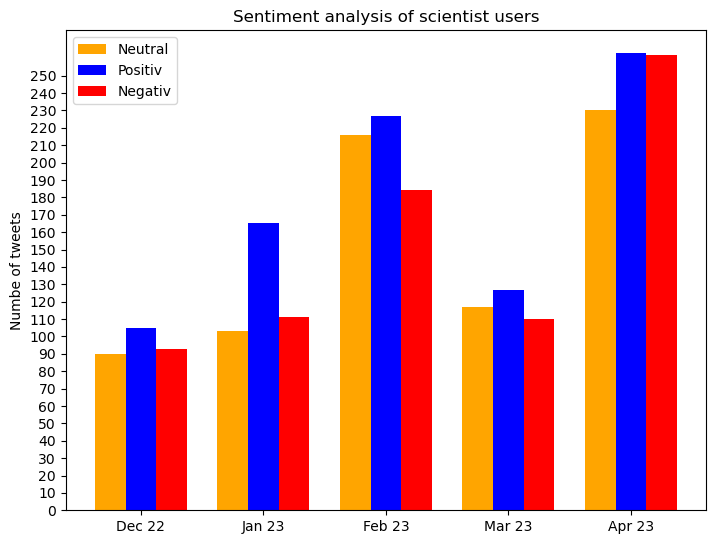

In [127]:
import numpy as np
import matplotlib.pyplot as plt

data = [[90, 103, 216, 117, 230], #neutral
[105, 165, 227, 127, 263], #positiv
[93, 111, 184, 110, 262]] #negativ
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.25, data[0], color = 'orange', width = 0.25)
ax.bar(X , data[1], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[2], color = 'r', width = 0.25)
ax.set_ylabel('Numbe of tweets')
ax.set_title('Sentiment analysis of scientist users')
ax.set_xticks(X, ('Dec 22', 'Jan 23', 'Feb 23', 'Mar 23', 'Apr 23'))
ax.set_yticks(np.arange(0, 260, 10))
ax.legend(labels=['Neutral', 'Positiv', 'Negativ'])
plt.show()

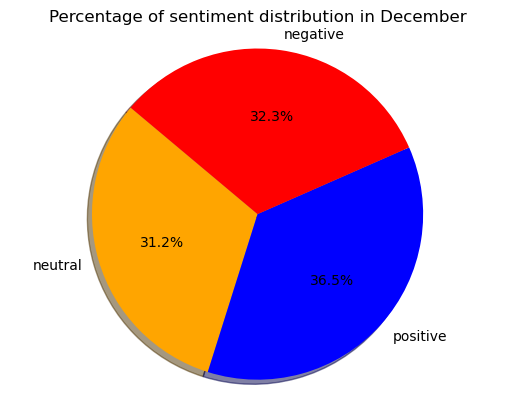

In [123]:
labels = ['neutral', 'positive', 'negative']
sizes = [data[0][0], data[1][0], data[2][0]]
colors = ['orange', 'blue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution in December')
plt.show()

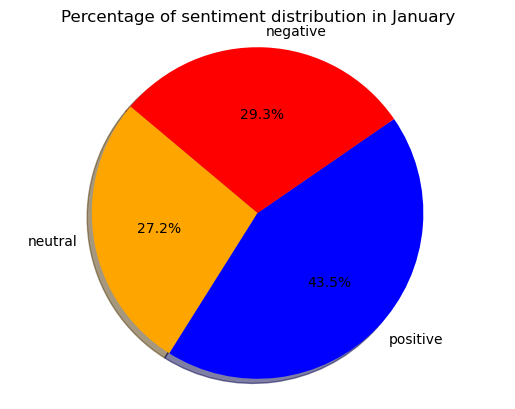

In [124]:
labels = ['neutral', 'positive', 'negative']
sizes = [data[0][1], data[1][1], data[2][1]]
colors = ['orange', 'blue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution in January')
plt.show()

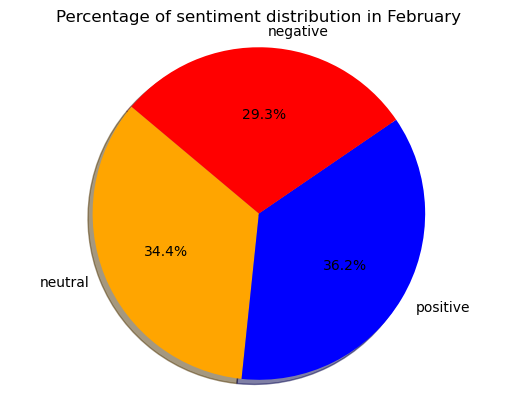

In [125]:
labels = ['neutral', 'positive', 'negative']
sizes = [data[0][2], data[1][2], data[2][2]]
colors = ['orange', 'blue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution in February')
plt.show()

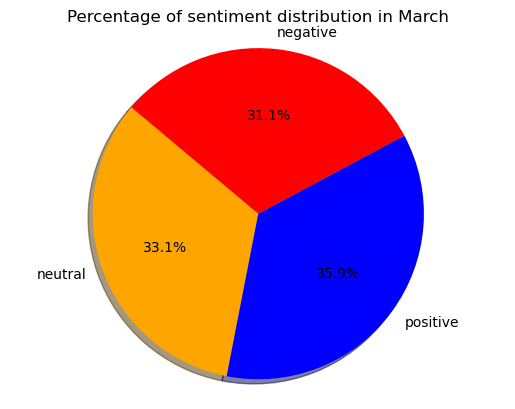

In [128]:
labels = ['neutral', 'positive', 'negative']
sizes = [data[0][3], data[1][3], data[2][3]]
colors = ['orange', 'blue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution in March')
plt.show()

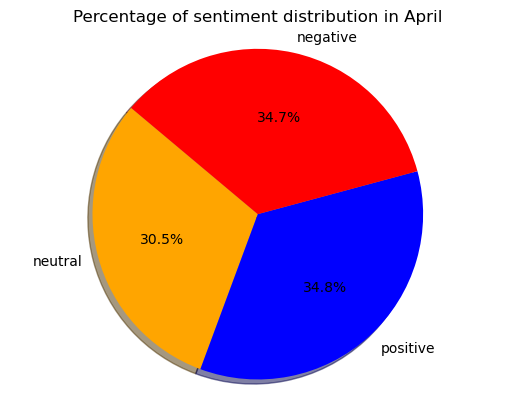

In [130]:
labels = ['neutral', 'positive', 'negative']
sizes = [data[0][4], data[1][4], data[2][4]]
colors = ['orange', 'blue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution in April')
plt.show()

In [171]:
import nltk
from nltk.corpus import stopwords
import re
import networkx

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ajkuna
[nltk_data]     Seipi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [176]:
# positiv tweets
# negativ tweets
positiv = result[result.label == 'positiv']
negativ = result[result.label == 'negativ']

In [177]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in negativ.tweets]
words_in_tweet[:2]

[['chatgpt',
  'gamechanging',
  'language',
  'model',
  'us',
  'power',
  'gpt',
  'provide',
  'insightful',
  'engaging',
  'response',
  'question',
  'youre',
  'looking',
  'information',
  'advice',
  'friendly',
  'conversation',
  'chatgpt',
  'got',
  'covered',
  'chatgpt'],
 ['signed',
  'chatgpt',
  'course',
  'udemy',
  'it',
  'important',
  'excel',
  'proactively',
  'learning',
  'contributes',
  'that',
  'learning',
  'learninganddevelopment',
  'artificialintelligence',
  'aichatbot',
  'aichatgpt',
  'chatgpt',
  'technicalwriter']]

In [178]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('chatgpt', 883),
 ('gpt', 284),
 ('openai', 230),
 ('google', 157),
 ('artificialintelligence', 143),
 ('microsoft', 139),
 ('autogpt', 134),
 ('generativeai', 128),
 ('new', 69),
 ('use', 60),
 ('amp', 51),
 ('model', 37),
 ('autonomous', 35),
 ('great', 35),
 ('student', 34)]

In [168]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

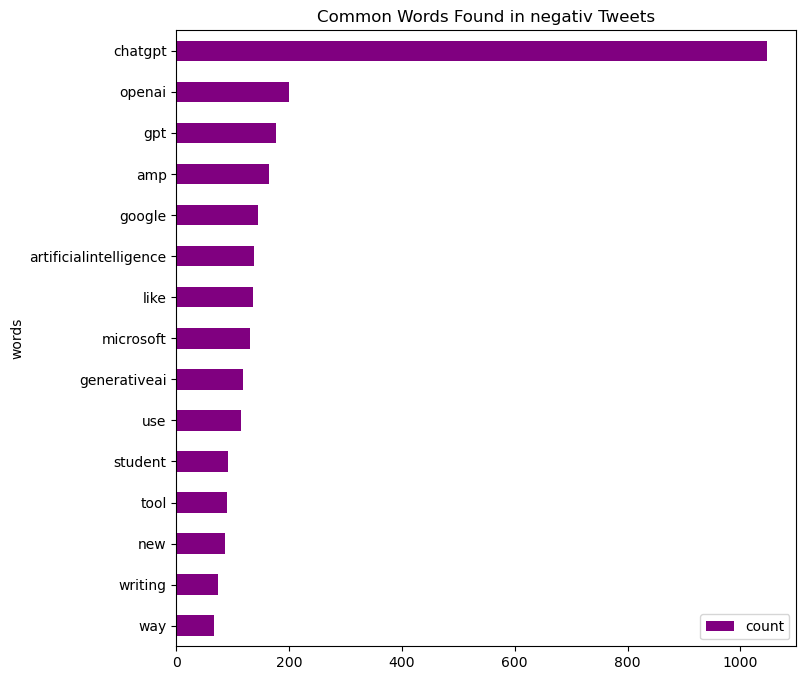

In [179]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in negativ Tweets")

plt.show()

In [180]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in positiv.tweets]
words_in_tweet[:2]

[['morning',
  'professional',
  'development',
  'video',
  'required',
  'teaching',
  'new',
  'world',
  'ethan',
  'mollick',
  'asugsv',
  'edtechsr',
  'edtech',
  'chatgpt',
  'singularity'],
 ['know',
  'chatgpt',
  'actually',
  'innovative',
  'work',
  'then',
  'it',
  'openai',
  'got',
  'crucial',
  'thing',
  'right',
  'datascience',
  'dnn',
  'genai',
  'chatgpt',
  'llm',
  'verbosity']]

In [181]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('chatgpt', 1047),
 ('openai', 200),
 ('gpt', 176),
 ('amp', 164),
 ('google', 144),
 ('artificialintelligence', 137),
 ('like', 135),
 ('microsoft', 131),
 ('generativeai', 118),
 ('use', 114),
 ('student', 91),
 ('tool', 89),
 ('new', 86),
 ('writing', 74),
 ('way', 66)]

In [182]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

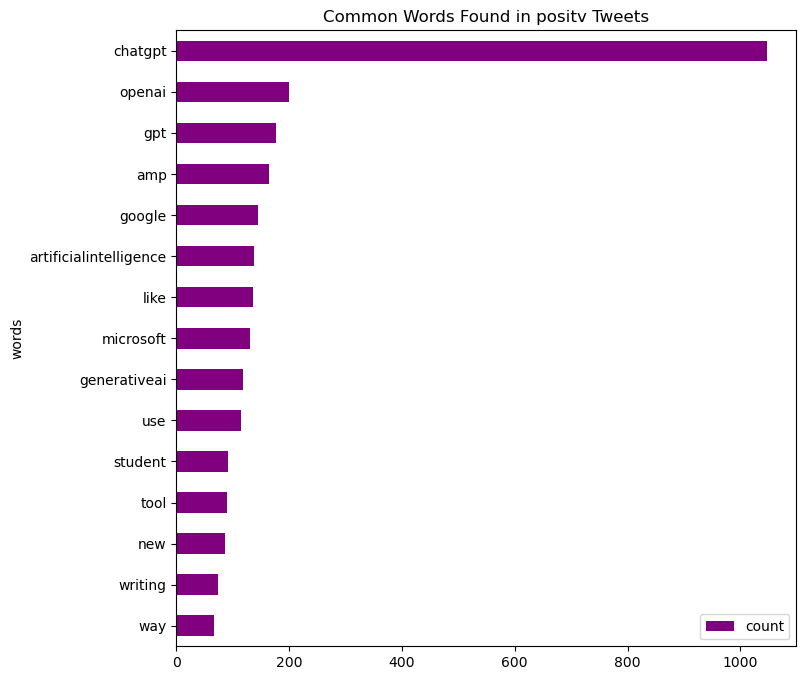

In [183]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in positv Tweets")

plt.show()